# Algorithme de la descente de gradient

Nous allons illustrer la procédure de la minimisation d'une fonction avec l'algorithme de la descente de gradient sur l'ensemble des fonctions 2D suivantes:
* 'p': $\mathcal{L}(\mathbf{w})=w_1^2+w_1. w_2+w_2^2$
* 'c': $\mathcal{L}(\mathbf{w})=\sqrt{w_1^2+w_2^2}$
* 'l': $\mathcal{L}(\mathbf{w})=\log(1+e^{-w_1-w_2})$
* 'e': $\mathcal{L}(\mathbf{w})=e^{-w_1-w_2}$
* 'b': $\mathcal{L}(\mathbf{w})=\frac{12\cos\left(\frac{w_1^2+w_2^2}{4}\right)}{3+w_1^2+w_2^2}$
* 'r': $(a-w_1)^2+b(w_2-w_1^1)^2; a=0.5, b=10$
* 'bu': $\frac{\cos(5w_1)\sin(5w_2)}{5}$


In [1]:
import numpy as np

def Functions(w1,w2,f):
    '''
    Pour des caractéristique w1 et w2 données, cette fonction renvoie la valeur d'une des fonctions dont 
    le type f est donnée en paramètre.
    '''
    if(f=='p'):
        return w1 ** 2 + w1*w2 + w2 ** 2
    elif(f=='c'):
        return np.sqrt(w1 ** 2 + w2 ** 2)
    elif(f=='l'):
        return np.log(1+np.exp(-w1-w2))# +0.2*(x**2+y**2)
    elif(f=='e'):
        return np.exp(-w1-w2)
    elif(f=='b'):
        return 12*np.cos((w1**2+w2**2)/4)/(3.0+w1**2+w2**2)
    elif(f=='r'):
        a=0.5
        b=10
        return (a-w1)**2+b*(w2-w1**2)**2
    elif(f=='bu'):
        return np.cos(5*w1)*np.sin(5*w2)/5
    

Les gradients des fonctions définies dans <i>Functions</i> sont:

In [2]:
def Gradient(w1,w2,f='p'):
    if(f=='p'):
        return 2*w1+w2,w1+2*w2
    elif(f=='c'):
        return w1/Functions(w1,w2,'c'), w2/Functions(w1,w2,'c')
    elif(f=='l'):
        return -1.0/(1.0+np.exp(w1+w2)), -1.0/(1.0+np.exp(w1+w2))
    elif(f=='e'):
        return -np.exp(-w1-w2),-np.exp(-w1-w2)
    elif(f=='b'):
        v=w1**2+w2**2
        return -((6*w1*np.sin(v/4))/(3+v))-((24*w1*np.cos(v/4))/(3+v)**2),-((6*w2*np.sin(v/4))/(3+v))-((24*w2*np.cos(v/4))/(3+v)**2)
    elif(f=='r'):
        a=0.5
        b=10
        return (-2.0*(a-w1)-4.0*b*w1*(w2-w1**2)),(2*b*(w2-w1**2))
    elif(f=='bu'):
        return np.cos(5*w1)*np.cos(5*w2),-1.0*np.sin(5*w1)*np.sin(5*w2)


On rappelle l'algorithme de la descente de gradient pour trouver le minimum d'une fonction convexe L:

`init : w
epoque=1
err=1
while epoque<=T
    w <- w - eta*grad(L(w))
    epoque <- epoque+1
output: w`



In [3]:

def AlgoGradientDescente(inf,sup,eta,T,f='p'):
    w1data=[]
    w2data=[]
    Ldata=[]

    w1data.append(inf)
    w2data.append(sup)
    Ldata.append(Functions(w1data[0],w2data[0],f))
    for t in range(1,T):
        gradw1, gradw2=Gradient(w1data[t-1],w2data[t-1],f)
        # Règle de mise à jour
        w1=w1data[t-1]-eta*gradw1
        w2=w2data[t-1]-eta*gradw2
        L=Functions(w1,w2,f)
    
        w1data.append(w1)
        w2data.append(w2)
        Ldata.append(L)
    return w1data,w2data,Ldata





L'application de cet algorithme itératif pour trouver les minimums des fonctions considérées est:

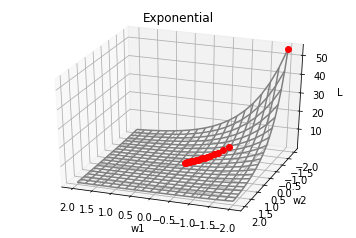

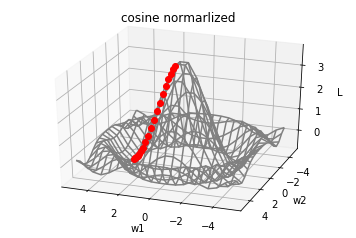

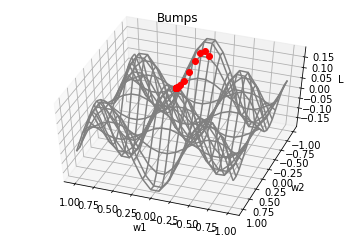

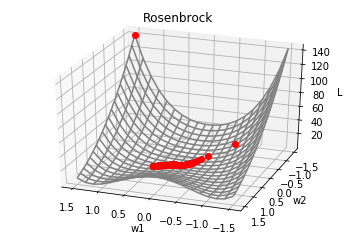

In [4]:
from mpl_toolkits import mplot3d
%matplotlib inline
#import random
import matplotlib.pyplot as plt



def PlotFonc3D(inf,sup,titre,f='p'):
    '''
    Cette fonction dessine un nuage de points en 3D. inf et sup correspondent aux bornes inférieures 
    et supérieures des intervalles du plan.
    Le paramètre titre renseigne sur le nom de fonction affiché en haut de la figure correspondante. 
    À l'exécution, cette fonction appelle la fonction polynomiale définie dans Functions.
    '''
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_xlabel('w1')
    ax.set_ylabel('w2')
    ax.set_zlabel('L')
    ax.set_title(titre)
    x = np.linspace(inf, sup, 20)
    y = np.linspace(inf, sup, 20)
    X, Y = np.meshgrid(x, y)
    Z = Functions(X, Y, f)
    ax.plot_wireframe(X, Y, Z, color='grey')
    return ax

ax=PlotFonc3D(-3,+3,"polynomial",'p')
X,Y,Z=AlgoGradientDescente(-3,-3,0.1,10,'p')
ax.plot3D(X,Y,Z, 'o', color="red");
ax.view_init(30, 110)

ax2=PlotFonc3D(-3,+3,"Logistic",'l')
X,Y,Z=AlgoGradientDescente(-3,-3,0.2,20,'l')
ax2.plot3D(X,Y,Z, 'o', color="red");
ax2.view_init(30, 110)

ax2=PlotFonc3D(-3,+3,"Cone",'c')
X,Y,Z=AlgoGradientDescente(-3,-3,0.5,20,'c')
ax2.plot3D(X,Y,Z, 'o', color="red");
ax2.view_init(30, 110)

ax2=PlotFonc3D(-2,+2,"Exponential",'e')
X,Y,Z=AlgoGradientDescente(-2,-2,0.02,20,'e')
ax2.plot3D(X,Y,Z, 'o', color="red");
ax2.view_init(30, 110)

ax=PlotFonc3D(-5,+5,"cosine normarlized",'b')
X,Y,Z=AlgoGradientDescente(0.5,0,0.1,20,'b')
ax.plot3D(X,Y,Z, 'o', color="red");
ax.view_init(30, 110)

ax=PlotFonc3D(-1,1,"Bumps",'bu')
X,Y,Z=AlgoGradientDescente(-0.05,-.8,0.1,1000,'bu')
ax.plot3D(X,Y,Z, 'o', color="red");
ax.view_init(50, 110)

ax=PlotFonc3D(-1.5,1.5,"Rosenbrock",'r')
X,Y,Z=AlgoGradientDescente(1.5,-1.5,0.01,1000,'r')
ax.plot3D(X,Y,Z, 'o', color="red");
ax.view_init(30, 110)
